# Implementación de PCA

Recordemos que dado un vector aleatorio $X=(X_{1},\dots, X_{n})$ con $\Sigma_{X}$ su matriz de covarianza (que supondremos no degenerada), podemos definir la $j$-ésima componente principal de $X$ como 
$$\xi_{j}=b_{j}\bullet X,$$
en dónde $b_{j}=(b_{j1},\dots, b_{jn})$ es un vector en $\mathbb{R}^{n}$ que se elige de acuerdo al siguiente problema de optimización:

$$\begin{align}
\max \text{Var}(\xi_{j})&=b_{j}\bullet\Sigma_{X}\bullet b_{j}\\
\text{sujeta a}&\\
||b_{j}||&=1 \quad \text{y} \quad b_{i}\bullet b_{j}=0 \ \ \forall i>j\geq 1.
\end{align}$$

**Teorema.-** Sea $X=(X_{1},\dots, X_{n})$ un vector aleatorio y sea $\Sigma_{X}$ su matriz de covarianza. Entonces, el problema de optimización para el sistema de ecuaciones $\{\xi_{j}\}_{j=1}^{p}$ tiene la siguiente solución:


1.   Descomponemos espectralmente a la matriz $Σ_{X}$ como $Σ_{X}=Q\Lambda Q^{-1}$, en donde $\Lambda=\text{diag}(\lambda_{1},\dots, \lambda_{n})$ con $\lambda_{i}\in Spec(Σ_{X})$ y $Q$ se forma a través de las eigenparejas $(λ_{i},b_{i})$.
2.   Ordenamos los eigenvalores de manera decreciente:
$$λ_{1}\geq\lambda_{2}\geq \cdots \geq λ_{n}$$



Aplicaremos el teorema anterior para dar una implementación del PCA usando datos sintéticos. Luego, aplicaremos nuestro resultado a la base de datos Iris de Fisher.

In [1]:
# Cómo crear datos sintéticos y matrices

import numpy as np

X = np.random.randint(10, 50, 100)

In [2]:
# Se calcula la media del vector

np.mean(X)

28.92

In [3]:
# Creamos una matriz a partir del arreglo anterior

Y = X.reshape(20,5)

In [4]:
np.mean(Y, axis = 0) # Calcula la media por columnas y las muestra en un arreglo

array([27.15, 28.5 , 32.75, 29.75, 26.45])

In [5]:
np.mean(Y, axis = 1) # Calcula la media por renglones y las muestra en un arreglo

array([35.6, 37.4, 40. , 21.8, 25.4, 28. , 22.4, 23.4, 35.6, 19.6, 36.6,
       29.6, 25.2, 31.6, 24.4, 31.4, 25.8, 16.2, 32. , 36.4])

In [6]:
# Centramos a los datos

Y_media = Y - np.mean(Y, axis = 0)


In [7]:
# Matriz de covarianza

S = np.cov(Y_media, rowvar = False)

print(S)

[[167.81842105  32.18421053  48.56578947  30.51315789  44.45526316]
 [ 32.18421053 126.47368421   9.23684211   4.65789474  14.5       ]
 [ 48.56578947   9.23684211 136.72368421  34.30263158  27.75      ]
 [ 30.51315789   4.65789474  34.30263158 151.35526316 -20.35526316]
 [ 44.45526316  14.5         27.75       -20.35526316  86.68157895]]


In [8]:
# Vamos a calcular eigenvalores y eigenvectores

eigen_val, eigen_vec = np.linalg.eigh(S)

In [9]:
eigen_val 

array([ 53.16683592,  94.65582206, 117.84425039, 155.86381682,
       247.52190639])

In [10]:
# Accesos

eigen_val[::-1]


array([247.52190639, 155.86381682, 117.84425039,  94.65582206,
        53.16683592])

In [11]:
# Reescribimos a los eigenvalores de manera decreciente

eigen_val = eigen_val[np.argsort(eigen_val)[::-1]]

eigen_val 

array([247.52190639, 155.86381682, 117.84425039,  94.65582206,
        53.16683592])

In [12]:
eigen_vec = eigen_vec[:,np.argsort(eigen_val)[::-1]]

eigen_vec

array([[-0.31407969,  0.6009013 ,  0.01745734, -0.24033731, -0.69440967],
       [-0.02136529, -0.41610049, -0.8158429 , -0.29871894, -0.26752805],
       [-0.24278551, -0.67326393,  0.47098048,  0.11839314, -0.50192762],
       [ 0.35853506,  0.10854429, -0.24721892,  0.81883715, -0.35785371],
       [ 0.84463322, -0.02668008,  0.22617648, -0.41047991, -0.25735838]])

In [13]:
n_components = 2 
eigenvector_2 = eigen_vec[:,0:n_components]

In [14]:
# Descomposición espectral

Y_red = np.dot(eigenvector_2.transpose(),Y_media.transpose()).transpose()


Y_red

array([[ -2.19624353,  11.21755179],
       [ -5.77608331, -10.83860491],
       [  9.12182949,   9.43034039],
       [ 13.51727834,   7.92345265],
       [ -5.75616167,   1.72798375],
       [  9.75584411,  -5.48664111],
       [  2.90113054,  -4.18362109],
       [  0.27980667,   4.70684356],
       [ -6.32282198, -10.23144915],
       [ -7.02383834,  -9.13438382],
       [ -9.63428555,  -1.14986916],
       [ -7.69700897,   4.27975061],
       [ -4.35279792,  10.30772624],
       [  3.96317403,  22.08165803],
       [  0.86739088,   3.37158241],
       [ 10.57063461, -12.77363257],
       [ -2.68456116,  -6.79061873],
       [-10.59723448,   6.93038233],
       [  5.63232002, -14.6740149 ],
       [  5.43162821,  -6.71443632]])

## La parte de la varianza explicada

**Definición.-** Llamamos a la parte de la varianza total de $X$ explicada por las primeras $k$ componentes principales $(\xi_{1},\dots, \xi_{k})_{k< p}$ a la cantidad:
$$\frac{λ_{1}+\cdots +λ_{k}}{\text{Tr}(Σ_{X})}.$$

Denotamos por $\rho_{ij}=\text{Corr}(\xi_{i},X_{i})$. Llamaremos a $\rho_{ij}^{2}$ la parte de la varianza de la variable $X_{i}$ explicada por la $j$-ésima componente principal $\xi_{j}$.

In [15]:
# Información total

eigen_val_total = sum(eigen_val)

varianza_explicada = [(i/ eigen_val_total )*100 for i in eigen_val ]

varianza_explicada = np.round(varianza_explicada, 2)

varianza_explicada_acumulada = np.cumsum(varianza_explicada)

print("Varianza explicada: {}".format(varianza_explicada))

print("Varianza explicada acumulada: {}".format(varianza_explicada_acumulada))

Varianza explicada: [37.   23.3  17.61 14.15  7.95]
Varianza explicada acumulada: [ 37.    60.3   77.91  92.06 100.01]


In [16]:
# Escribimos lo anterior como función 
def PCA(X , num_componentes):
     
    X_media = X - np.mean(X , axis = 0)
     
    cov_mat = np.cov(X_media , rowvar = False)
     
    eigen_val , eigen_vec = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigen_val)[::-1]
    sorted_eigenval = eigen_val[sorted_index]
    sorted_eigenvec = eigen_vec[:,sorted_index]
     
    eigenvector_ = sorted_eigenvec[:,0:num_componentes]
     
    X_red = np.dot(eigenvector_.transpose() , X_media.transpose() ).transpose()
     
    return X_red

## PCA con sklearn

In [17]:
import pandas as pd
 
# Datos de Iris de Fisher
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#se preparan los datos
x = data.iloc[:,0:4]
 
target = data.iloc[:,4]
 
# Aplicamos PCA a los datos elegidos
mat_red = PCA(x , 2)
 
# Tabla que muestra a las dos componentes principales
principal_df = pd.DataFrame(mat_red , columns = ['PC1','PC2'])
 

principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

In [18]:
principal_df

,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

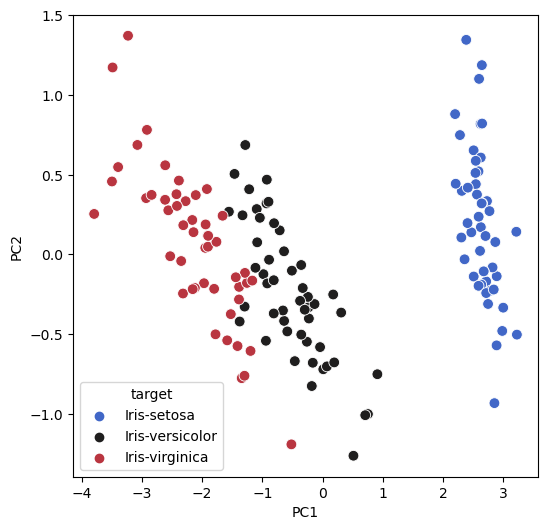

In [19]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')


## Componentes principales en el círculo

**Teorema.-** Sean $X_{i}$ y $X_{j}$ dos variables aleatorias enteramente explicadas por las dos primeras componentes principales, esto es
$$\rho_{i1}^{2}+ρ_{i2}^2 =1 \ \text{y} \ \rho_{k1}^{2}+ρ_{k2}^2 =1.$$
Entonces, 
$$\text{Corr}(X_{i},X_{k})=\rho_{i1}\rho_{k1}+\rho_{i2}\rho_{k2}=\cos(\varphi),$$
donde $φ$ es el ángulo formado por los vectores $(\rho_{i1},\rho_{i2})$ y $(\rho_{k1},\rho_{k2})$.

Por lo tanto, si las variables $X_{i}$ y $X_{k}$ están enteramente explicadaspor las dos primeras componentes principales, el ángulo $φ$ describe la dependencia mutua de tales variables. En efecto, si el $φ=0$, entonces $\text{Corr}(X_{i},X_{j})=1$, esto significa que:
$$∃ \ a>0, \ b\in \mathbb{R} \ \text{tales que} \ \ X_{j}=aX_{k}+b.$$

Similarmente, si $φ=\pi/2$, las variables $X_{i}$ y $X_{k}$ son no correlacionadas.

## PCA a través de **sklearn**: gráfica scree

In [20]:
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets
from sklearn.decomposition import PCA

In [21]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) 
df.to_csv("iris_download.csv", index = False)
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
X = df.loc[:, 'sepal_len':'petal_wid'].values
y = df.loc[:, 'class'].values

pca = PCA() 
X_r = pca.fit(X).transform(X)

In [23]:
target_names = df.iloc[:,4].unique()
target_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

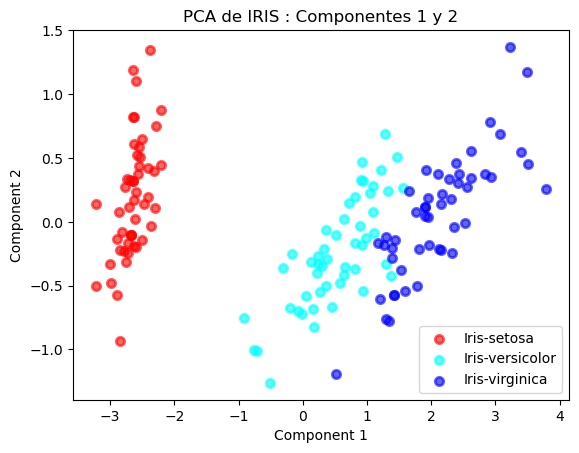

In [35]:
def pca_scatter(pca1, pca2):
    plt.close
    plt.figure()
    colors = ['red', 'cyan', 'blue']
    lw = 2


    for color, target_name in zip(colors, target_names):
        plt.scatter(X_r[y == target_name, pca1], X_r[y == target_name, pca2], color=color, alpha=.6, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA de IRIS : Componentes {} y {}'.format(pca1+1, pca2+1))
    plt.xlabel('Component {}'.format(pca1+1))
    plt.ylabel('Component {}'.format(pca2+1))
    plt.show()

pca_scatter(0, 1)

In [25]:
X_r = pca.fit(X).transform(X)
print('\nEigenvalores \n%s' %pca.explained_variance_)
print('Eigenvectores \n%s' %pca.components_)


Eigenvalores 
[4.22484077 0.24224357 0.07852391 0.02368303]
Eigenvectores 
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]


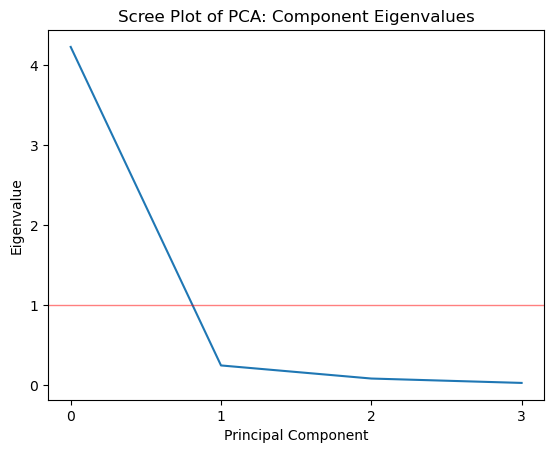

In [26]:
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

scree_plot()

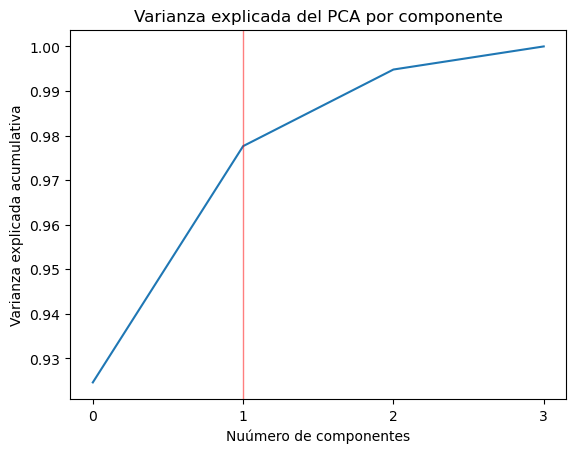

In [27]:
def var_explicada():
    import numpy as np
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Nuúmero de componentes')
    plt.ylabel('Varianza explicada acumulativa')
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Varianza explicada del PCA por componente')
    show()

var_explicada()

### Ejercicio. 
Considera los siguientes puntos en $\mathbb{R}^{2}$:
	$$(4,11), \ (8,4), \ (13,5), \ (7,14).$$
Calcula las dos componentes principales y muestra que no están correlacionadas.

In [28]:
import numpy as np 

In [29]:
X1 = [4, 8, 13, 7]
X2 = [11, 4, 5, 14]

In [30]:
barX1 = sum(X1) / len(X1)
barX2 = sum(X2) / len(X2)

covX1X2 = sum((a - barX1) * (b - barX2) for (a,b) in zip(X1,X2)) / (len(X1)-1) 

In [31]:
varX1 = np.var(X1, ddof = 1)
varX2 = np.var(X2, ddof = 1)

print(varX1)
print(varX2) 

14.0
23.0


In [32]:
# La matriz de covarianza

S = np.cov(np.array(X1), np.array(X2))

print(S)

[[ 14. -11.]
 [-11.  23.]]


In [33]:
eigen_val, eigen_vec = np.linalg.eigh(S) 

print(eigen_val)
print(eigen_vec)  

[ 6.61513568 30.38486432]
[[-0.83025082 -0.55738997]
 [-0.55738997  0.83025082]]


Por lo tanto, la primera componente principal es:
$$\eta_{1}=-0.5573X_{11}+0.8303X_{12}.$$